<h1 style="color: red;">Beer Rating Prediction Project</h1>

The primary objective of this project is to develop a Machine Learning model capable of predicting the overall rating of beer based on various features such as beer characteristics, user reviews etc. The model aims to extract meaningful insights from the dataset to help breweries and consumers understand key factors influencing beer ratings.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import re
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px

import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

from nltk import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings(action = 'ignore')

%matplotlib inline

In [2]:
#data loading
df = pd.read_csv('train.csv')
df.head()

index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   
3            3.0           3.0   
4            3.5           2.5   

                                         review/text  \
0  Pours a clouded gold with a thin white head. N...   
1  12oz bottle into 8oz snifter.\t\tDeep ruby red...   
2  First enjoyed at the brewpub about 2 years ago...   
3  First thing I noticed after pouring from green...   
4  A: pours an amber with a one finger head but o...   

                                   review/timeStruct  review/timeUnix  \
0  {'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...       1229398690   
1  {'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...       1218238738   
2  {'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...       1101492422   
3  {'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...       1308532025   
4  {'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...       1299912708   

   user/ageInSeconds user/birthdayRaw  user/birthdayUnix user/gender  \
0                NaN              NaN                NaN         NaN   
1                NaN              NaN                NaN         NaN   
2                NaN              NaN                NaN        Male   
3       1.209827e+09     Aug 10, 1976        208508400.0        Male   
4                NaN              NaN                NaN         NaN   

  user/profileName  
0       RblWthACoz  
1          BeerSox  
2       mschofield  
3        molegar76  
4       Brewbro000

In [3]:
#Rename the columns
df.columns = df.columns.str.lower().str.replace("/", "_") 

In [4]:
#show top 5 samples
df.head()

index  beer_abv  beer_beerid  beer_brewerid                  beer_name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer_style  review_appearance  review_aroma  review_overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review_palate  review_taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   
3            3.0           3.0   
4            3.5           2.5   

                                         review_text  \
0  Pours a clouded gold with a thin white head. N...   
1  12oz bottle into 8oz snifter.\t\tDeep ruby red...   
2  First enjoyed at the brewpub about 2 years ago...   
3  First thing I noticed after pouring from green...   
4  A: pours an amber with a one finger head but o...   

                                   review_timestruct  review_timeunix  \
0  {'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...       1229398690   
1  {'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...       1218238738   
2  {'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...       1101492422   
3  {'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...       1308532025   
4  {'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...       1299912708   

   user_ageinseconds user_birthdayraw  user_birthdayunix user_gender  \
0                NaN              NaN                NaN         NaN   
1                NaN              NaN                NaN         NaN   
2                NaN              NaN                NaN        Male   
3       1.209827e+09     Aug 10, 1976        208508400.0        Male   
4                NaN              NaN                NaN         NaN   

  user_profilename  
0       RblWthACoz  
1          BeerSox  
2       mschofield  
3        molegar76  
4       Brewbro000

In [5]:
#Show last 5 samples
df.tail()

index  beer_abv  beer_beerid  beer_brewerid  \
37495  35175      5.50        22450           3268   
37496  23666      8.50         7463           1199   
37497  47720      4.75         1154            394   
37498  33233     11.20        19960           1199   
37499  23758      8.50         7463           1199   

                                     beer_name  \
37495                Blackberry Scottish-Style   
37496                   Founders Dirty Bastard   
37497                            Stoudt's Fest   
37498  Founders KBS (Kentucky Breakfast Stout)   
37499                   Founders Dirty Bastard   

                             beer_style  review_appearance  review_aroma  \
37495            Fruit / Vegetable Beer                4.0           3.5   
37496            Scotch Ale / Wee Heavy                4.5           4.0   
37497             MÃ¤rzen / Oktoberfest                4.0           3.5   
37498  American Double / Imperial Stout                4.0           4.0   
37499            Scotch Ale / Wee Heavy                4.0           4.0   

       review_overall  review_palate  review_taste  \
37495             3.5            3.5           3.5   
37496             3.5            4.5           4.5   
37497             4.0            4.5           4.0   
37498             4.0            5.0           5.0   
37499             4.0            4.5           4.0   

                                             review_text  \
37495  12 oz brown longneck with no freshness dating....   
37496  A - A bright red with a maroon-amber hue; mini...   
37497  Sampled on tap at Redbones.\t\tThis marzen sty...   
37498  Pours a black body with a brown head that very...   
37499  A nice sweet, malty beer...nothing complex, ju...   

                                       review_timestruct  review_timeunix  \
37495  {'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...       1207871761   
37496  {'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...       1263102314   
37497  {'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...       1067043816   
37498  {'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...       1296330753   
37499  {'min': 40, 'hour': 18, 'mday': 4, 'sec': 28, ...       1252089628   

       user_ageinseconds user_birthdayraw  user_birthdayunix user_gender  \
37495                NaN              NaN                NaN         NaN   
37496                NaN              NaN                NaN         NaN   
37497                NaN              NaN                NaN         NaN   
37498                NaN              NaN                NaN         NaN   
37499                NaN              NaN                NaN         NaN   

      user_profilename  
37495         Redrover  
37496         jmerloni  
37497       UncleJimbo  
37498       Stockfan42  
37499           JayQue

In [6]:
#Show number of rows and columns
df.shape

(37500, 19)

In [7]:
#show some info. ex- datatypes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer_abv           37500 non-null  float64
 2   beer_beerid        37500 non-null  int64  
 3   beer_brewerid      37500 non-null  int64  
 4   beer_name          37500 non-null  object 
 5   beer_style         37500 non-null  object 
 6   review_appearance  37500 non-null  float64
 7   review_aroma       37500 non-null  float64
 8   review_overall     37500 non-null  float64
 9   review_palate      37500 non-null  float64
 10  review_taste       37500 non-null  float64
 11  review_text        37490 non-null  object 
 12  review_timestruct  37500 non-null  object 
 13  review_timeunix    37500 non-null  int64  
 14  user_ageinseconds  7856 non-null   float64
 15  user_birthdayraw   7856 non-null   object 
 16  user_birthdayunix  785

In [8]:
# Summary statistics of numerical features
df.describe() 

index      beer_abv   beer_beerid  beer_brewerid  \
count  37500.000000  37500.000000  37500.000000   37500.000000   
mean   24951.887573      7.403725  21861.152027    3036.595120   
std    14434.009669      2.318145  18923.130832    5123.084675   
min        0.000000      0.100000    175.000000       1.000000   
25%    12422.500000      5.400000   5441.000000     395.000000   
50%    24942.500000      6.900000  17538.000000    1199.000000   
75%    37416.750000      9.400000  34146.000000    1315.000000   
max    49999.000000     57.700000  77207.000000   27797.000000   

       review_appearance  review_aroma  review_overall  review_palate  \
count       37500.000000  37500.000000     37500.00000   37500.000000   
mean            3.900053      3.873240         3.88944       3.854867   
std             0.588778      0.680865         0.70045       0.668068   
min             0.000000      1.000000         0.00000       1.000000   
25%             3.500000      3.500000         3.50000       3.500000   
50%             4.000000      4.000000         4.00000       4.000000   
75%             4.500000      4.500000         4.50000       4.500000   
max             5.000000      5.000000         5.00000       5.000000   

       review_taste  review_timeunix  user_ageinseconds  user_birthdayunix  
count  37500.000000     3.750000e+04       7.856000e+03       7.856000e+03  
mean       3.922440     1.232794e+09       1.176705e+09       2.416303e+08  
std        0.716504     7.190955e+07       3.375514e+08       3.375514e+08  
min        1.000000     9.262944e+08       7.034366e+08      -2.208960e+09  
25%        3.500000     1.189194e+09       9.794810e+08       1.433628e+08  
50%        4.000000     1.248150e+09       1.100009e+09       3.183264e+08  
75%        4.500000     1.291330e+09       1.274973e+09       4.388544e+08  
max        5.000000     1.326267e+09       3.627295e+09       7.148988e+08

In [9]:
# Summary statistics of categorical features
df.describe(include=['object'])

beer_name                        beer_style  \
count                      37500                             37500   
unique                      1688                                95   
top     Founders Breakfast Stout  American Double / Imperial Stout   
freq                        1883                              4495   

                                              review_text  \
count                                               37490   
unique                                              37482   
top     The beer has a bit of a reddish color to it, w...   
freq                                                    2   

                                        review_timestruct user_birthdayraw  \
count                                               37500             7856   
unique                                              37490             1432   
top     {'min': 0, 'hour': 0, 'mday': 10, 'sec': 1, 'y...     Sep 14, 1980   
freq                                                    3               76   

       user_gender user_profilename  
count        15314            37495  
unique           2             7441  
top           Male   northyorksammy  
freq         15069              141

In [10]:
#Check null values
df.isnull().sum()

index                    0
beer_abv                 0
beer_beerid              0
beer_brewerid            0
beer_name                0
beer_style               0
review_appearance        0
review_aroma             0
review_overall           0
review_palate            0
review_taste             0
review_text             10
review_timestruct        0
review_timeunix          0
user_ageinseconds    29644
user_birthdayraw     29644
user_birthdayunix    29644
user_gender          22186
user_profilename         5
dtype: int64

In [11]:
#Null value in percentage
(df.isna().sum()/len(df))*100

index                 0.000000
beer_abv              0.000000
beer_beerid           0.000000
beer_brewerid         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_aroma          0.000000
review_overall        0.000000
review_palate         0.000000
review_taste          0.000000
review_text           0.026667
review_timestruct     0.000000
review_timeunix       0.000000
user_ageinseconds    79.050667
user_birthdayraw     79.050667
user_birthdayunix    79.050667
user_gender          59.162667
user_profilename      0.013333
dtype: float64

As we can see above null values in review_text & user_profilename columns are very less so we can drop them.

In [12]:
#drop rows with null values
df.dropna(subset=['review_text','user_profilename'],axis=0,inplace=True)

user_gender
Male      15063
Female      245
Name: count, dtype: int64


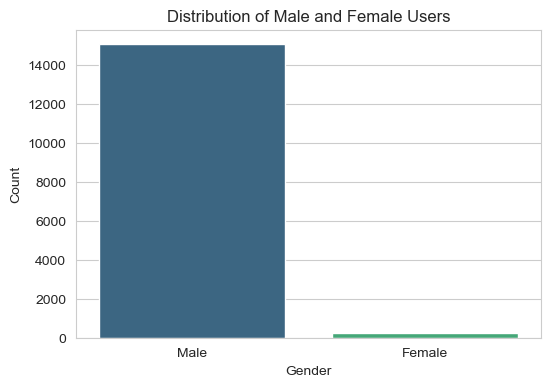

In [13]:
# Count of male and female users
gender_counts = df['user_gender'].value_counts()
print(gender_counts)
# Plot bar graph
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Male and Female Users")
plt.show()

As we can see above most of the user are Male this will also not much contribute for final rating prediction.

user_ageinseconds,user_birthdayraw,user_birthdayunix,user_gender have huge number of null values and these 
features are not much important for over all rating prediction so we can droping these features.

In [14]:
#Drop unnecessary columns
df.drop(['user_ageinseconds','user_birthdayraw','user_birthdayunix',
         'review_timestruct','user_gender','index'],axis=1,inplace=True)
df.head(2)

beer_abv  beer_beerid  beer_brewerid                 beer_name  \
0       5.0        46634          14338                  Chiostro   
1      11.0         3003            395  Bearded Pat's Barleywine   

             beer_style  review_appearance  review_aroma  review_overall  \
0  Herbed / Spiced Beer                4.0           4.0             4.0   
1   American Barleywine                4.0           3.5             3.5   

   review_palate  review_taste  \
0            4.0           4.0   
1            3.5           3.0   

                                         review_text  review_timeunix  \
0  Pours a clouded gold with a thin white head. N...       1229398690   
1  12oz bottle into 8oz snifter.\t\tDeep ruby red...       1218238738   

  user_profilename  
0       RblWthACoz  
1          BeerSox

In [15]:
df.isnull().sum()

beer_abv             0
beer_beerid          0
beer_brewerid        0
beer_name            0
beer_style           0
review_appearance    0
review_aroma         0
review_overall       0
review_palate        0
review_taste         0
review_text          0
review_timeunix      0
user_profilename     0
dtype: int64

Now all the null values have been removed.

## Handing datatypes

In [16]:
df.dtypes

beer_abv             float64
beer_beerid            int64
beer_brewerid          int64
beer_name             object
beer_style            object
review_appearance    float64
review_aroma         float64
review_overall       float64
review_palate        float64
review_taste         float64
review_text           object
review_timeunix        int64
user_profilename      object
dtype: object

In [17]:
#converting unix time to standard datetime format
df['review_timeunix'] = pd.to_datetime(df['review_timeunix'], unit='s')

## Checking Duplicates

In [18]:
#Checking duplicate rows 
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


- No duplicate value in any row

In [19]:
#Creating New Features
df['review_year'] = df['review_timeunix'].dt.year
df['review_month'] = df['review_timeunix'].dt.month
df['review_dayofweek'] = df['review_timeunix'].dt.dayofweek
df['review_hour'] = df['review_timeunix'].dt.hour
df.head(3)

beer_abv  beer_beerid  beer_brewerid                 beer_name  \
0       5.0        46634          14338                  Chiostro   
1      11.0         3003            395  Bearded Pat's Barleywine   
2       4.7          961            365      Naughty Nellie's Ale   

                beer_style  review_appearance  review_aroma  review_overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   

   review_palate  review_taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   

                                         review_text     review_timeunix  \
0  Pours a clouded gold with a thin white head. N... 2008-12-16 03:38:10   
1  12oz bottle into 8oz snifter.\t\tDeep ruby red... 2008-08-08 23:38:58   
2  First enjoyed at the brewpub about 2 years ago... 2004-11-26 18:07:02   

  user_profilename  review_year  review_month  review_dayofweek  review_hour  
0       RblWthACoz         2008            12                 1            3  
1          BeerSox         2008             8                 4           23  
2       mschofield         2004            11                 4           18

In [20]:
#droping review_timeunix column
df.drop('review_timeunix',axis=1,inplace=True)

In [21]:
#No. of unique values in each column
df.nunique()

beer_abv               126
beer_beerid           1731
beer_brewerid          212
beer_name             1688
beer_style              95
review_appearance       10
review_aroma             9
review_overall          10
review_palate            9
review_taste             9
review_text          37477
user_profilename      7439
review_year             14
review_month            12
review_dayofweek         7
review_hour             24
dtype: int64

In [22]:
df['user_profilename'].value_counts().head()#top most user

user_profilename
northyorksammy    141
BuckeyeNation     110
mikesgroove        92
ChainGangGuy       84
MasterSki          83
Name: count, dtype: int64

# Univariate Analysis

#### Categorical features

In [23]:
#Total number of unique Beer Names
print("Unique Beers:", df['beer_name'].nunique())

Unique Beers: 1688


In [24]:
#Total number of unique Users
df['user_profilename'].nunique()

7439

<Axes: title={'center': 'Most Popular Beers by Name'}, xlabel='beer_name'>

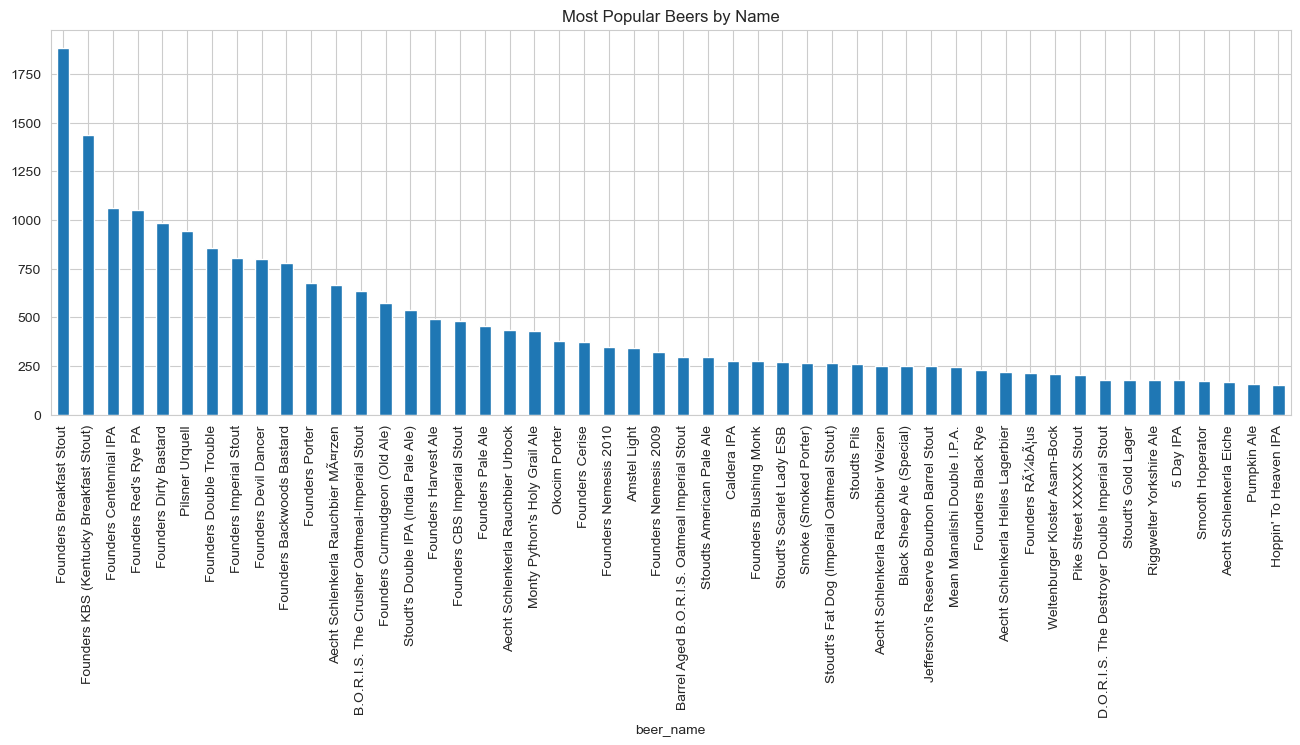

In [25]:
#Most Popular Beers by Beer Name
df['beer_name'].value_counts().head(50).plot.bar(figsize=(16,5),title='Most Popular Beers by Name')

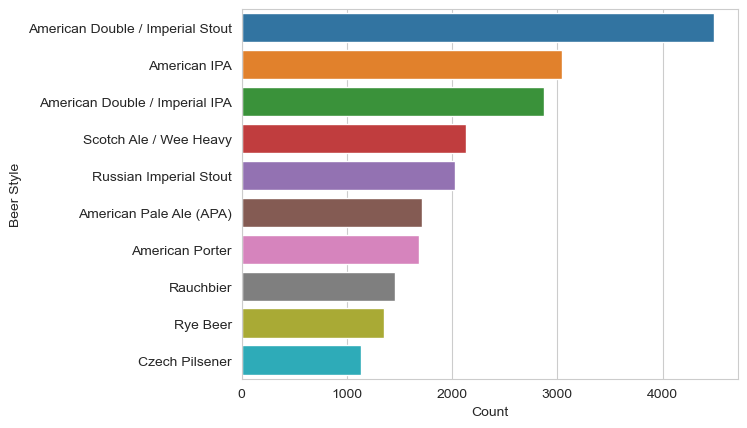

In [26]:
#Visualize beer style popularity
# top 10 beer styles:
top_styles = df['beer_style'].value_counts().nlargest(10)
sns.barplot(x=top_styles.values, y=top_styles.index)
plt.xlabel("Count")
plt.ylabel("Beer Style")
plt.show()


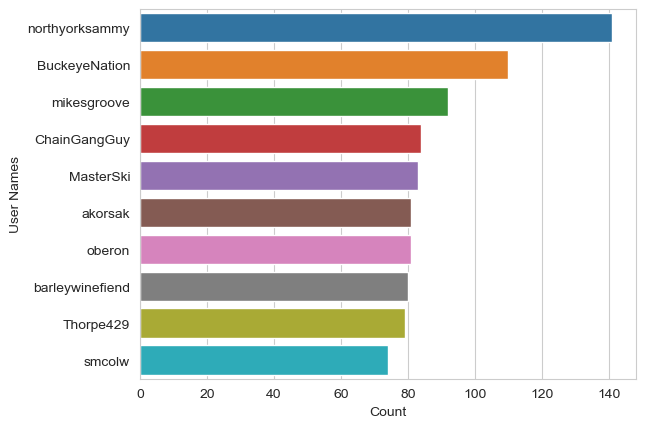

In [27]:
# top 10 user:
top_styles = df['user_profilename'].value_counts().nlargest(10)
sns.barplot(x=top_styles.values, y=top_styles.index)
plt.xlabel("Count")
plt.ylabel("User Names")
plt.show()

## Numerical features

### Checking Distribution and Outliers Present in the features

In [28]:
def plot_dist_and_detect_outliers(df, column_name):
    plt.figure(figsize=(16,5))

    # Histogram with KDE
    plt.subplot(121) 
    sns.histplot(df[column_name], bins=50, kde=True)
    plt.xlabel(column_name)
    plt.title(f"Distribution of {column_name}")

    # Box Plot
    plt.subplot(122) 
    sns.boxplot(x=df[column_name])
    plt.xlabel(column_name)
    plt.title(f"Box Plot of {column_name}")

    plt.tight_layout()
    plt.show()

#### Alcohol By Volume

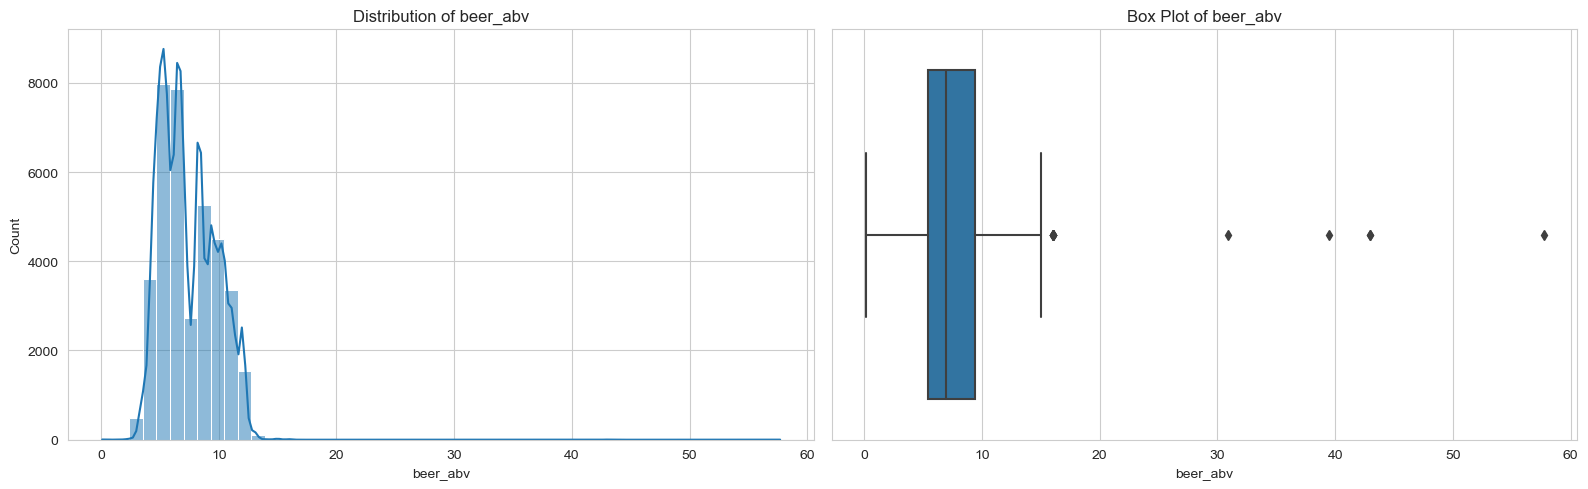

In [29]:
plot_dist_and_detect_outliers(df, 'beer_abv')

- It can be infered that almost all of the majority data in the distribution of 'beer_ABV' is between 5-10 with long tail towards right.
- Data is not perfectly normally distributed but good overall.
- Also We can see that the feature 'beer_abv' has presence of outlier values.

#### Review Overall

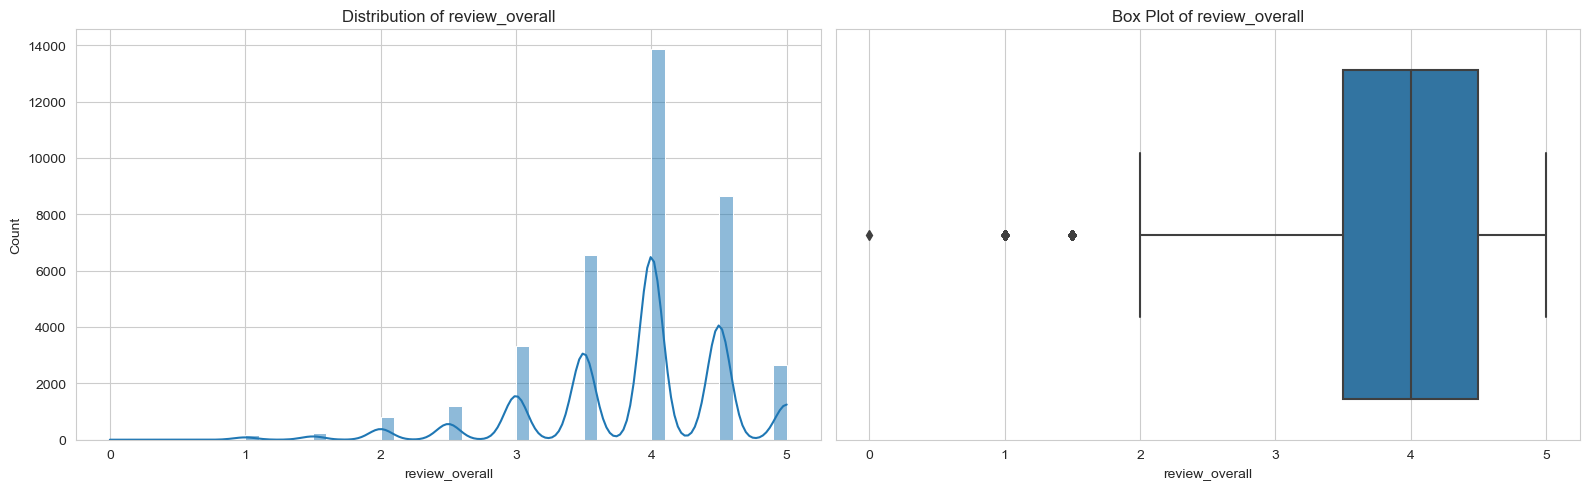

In [30]:
plot_dist_and_detect_outliers(df, 'review_overall')

- It can be infered that the overall ratings are distributed in the range of 1 to 5 with most common rating is 4.
- Data is not normally distributed, left-skewness is observed in the data.
- Also the the IQR for the overall review feature is observed to be between 3.5-4.5.

#### Review Taste

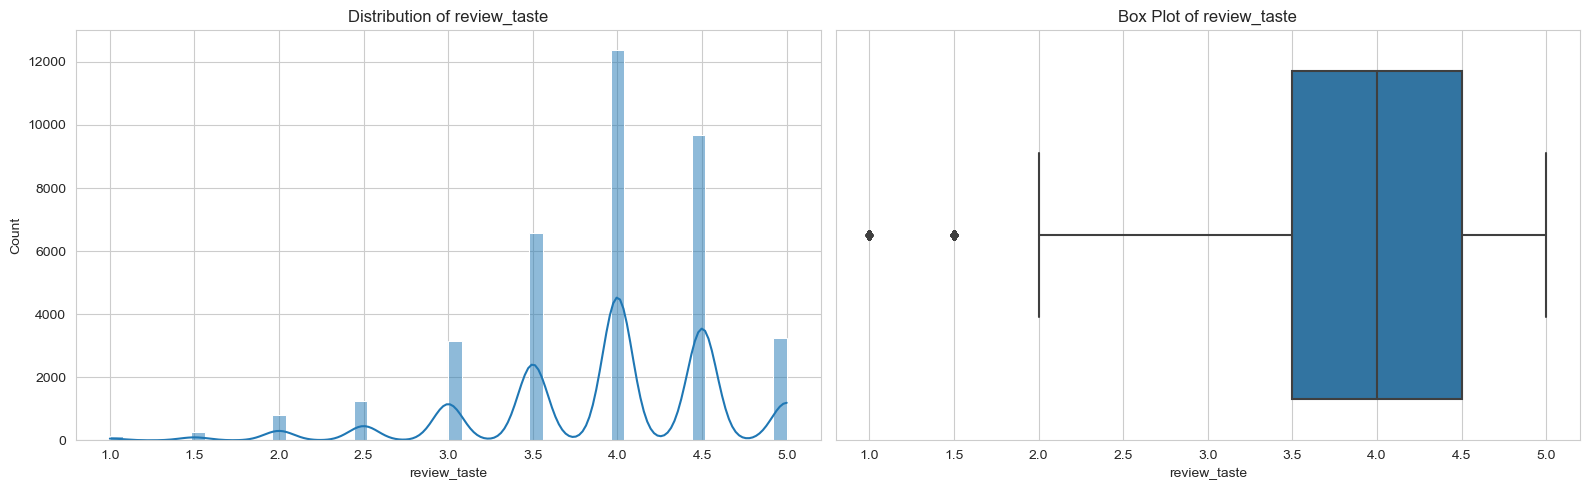

In [31]:
plot_dist_and_detect_outliers(df, 'review_taste')

#### Review Appearance

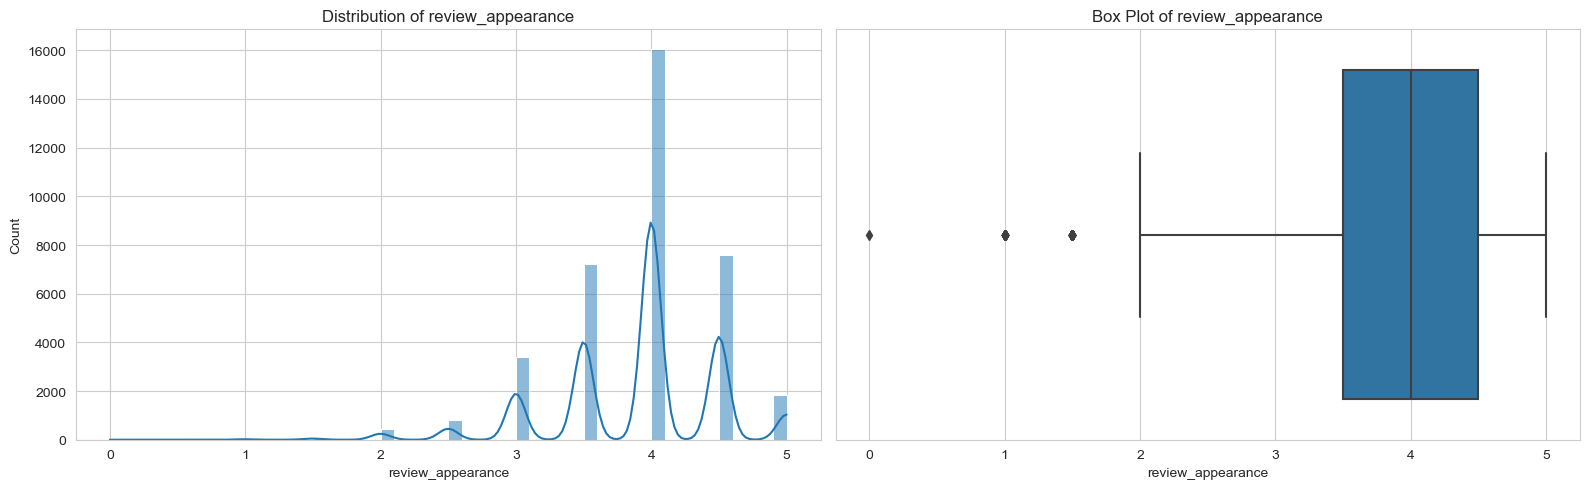

In [32]:
plot_dist_and_detect_outliers(df, 'review_appearance')

#### Review Palate

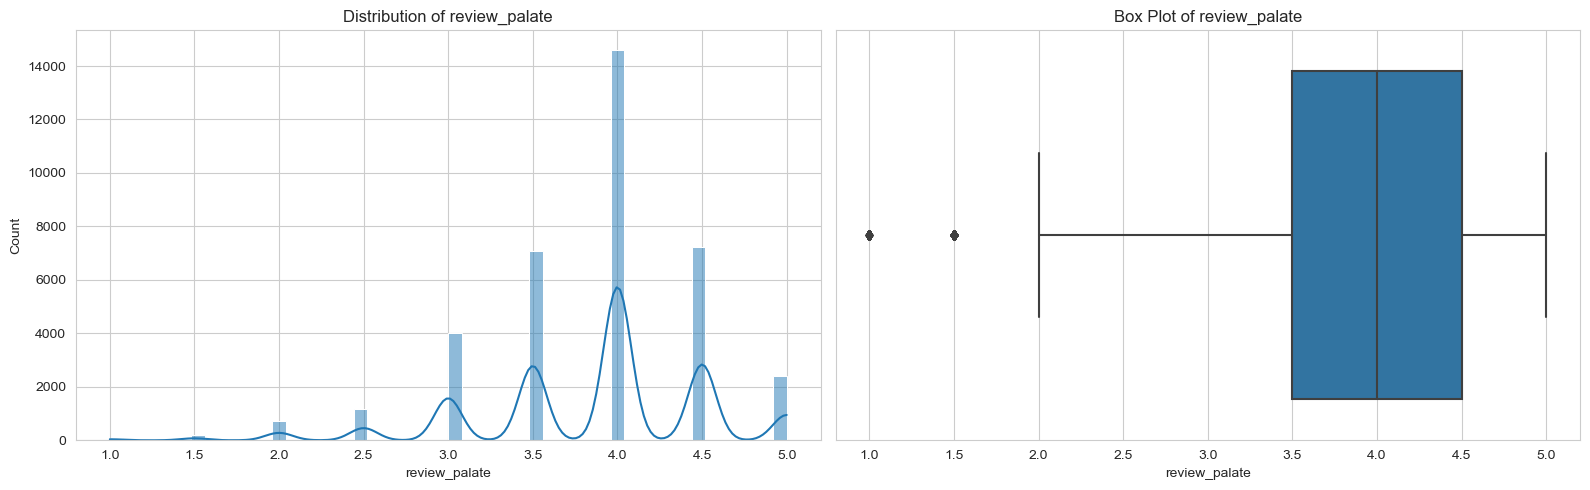

In [33]:
plot_dist_and_detect_outliers(df, 'review_palate')

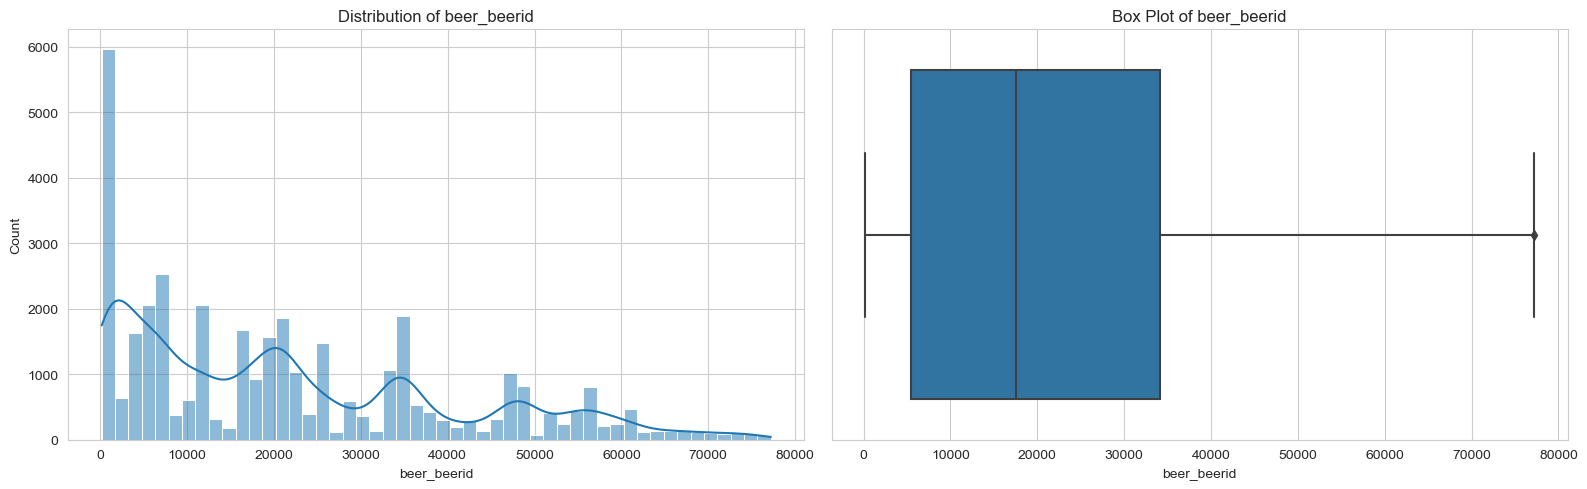

In [34]:
plot_dist_and_detect_outliers(df, 'beer_beerid')

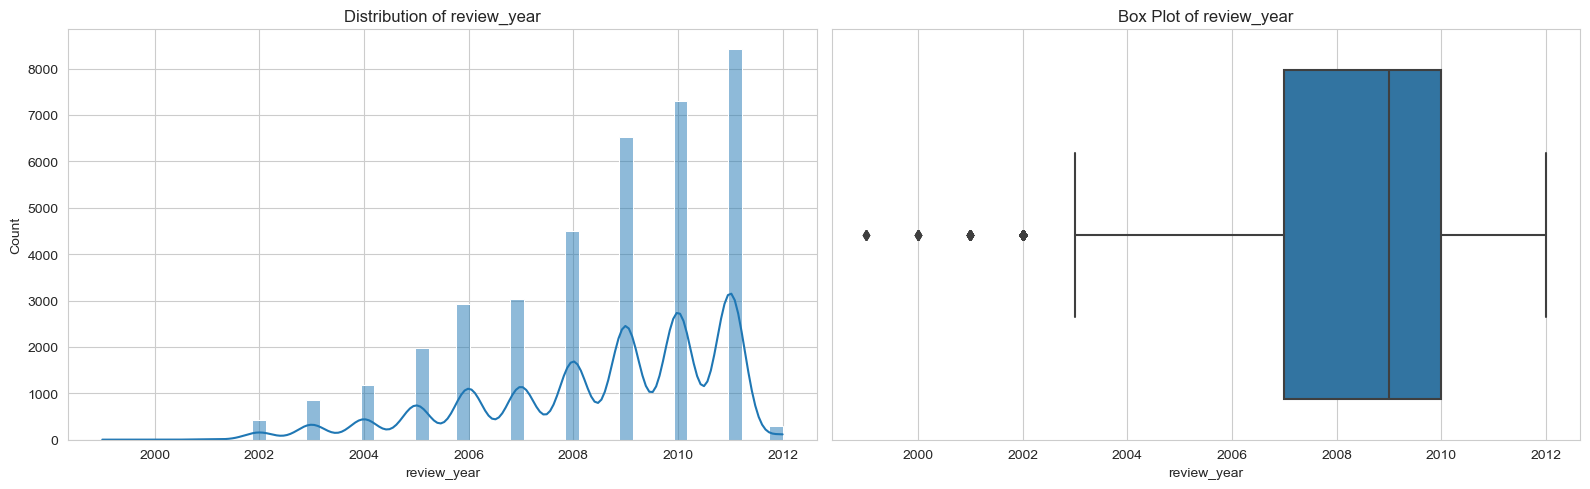

In [35]:
plot_dist_and_detect_outliers(df, 'review_year')

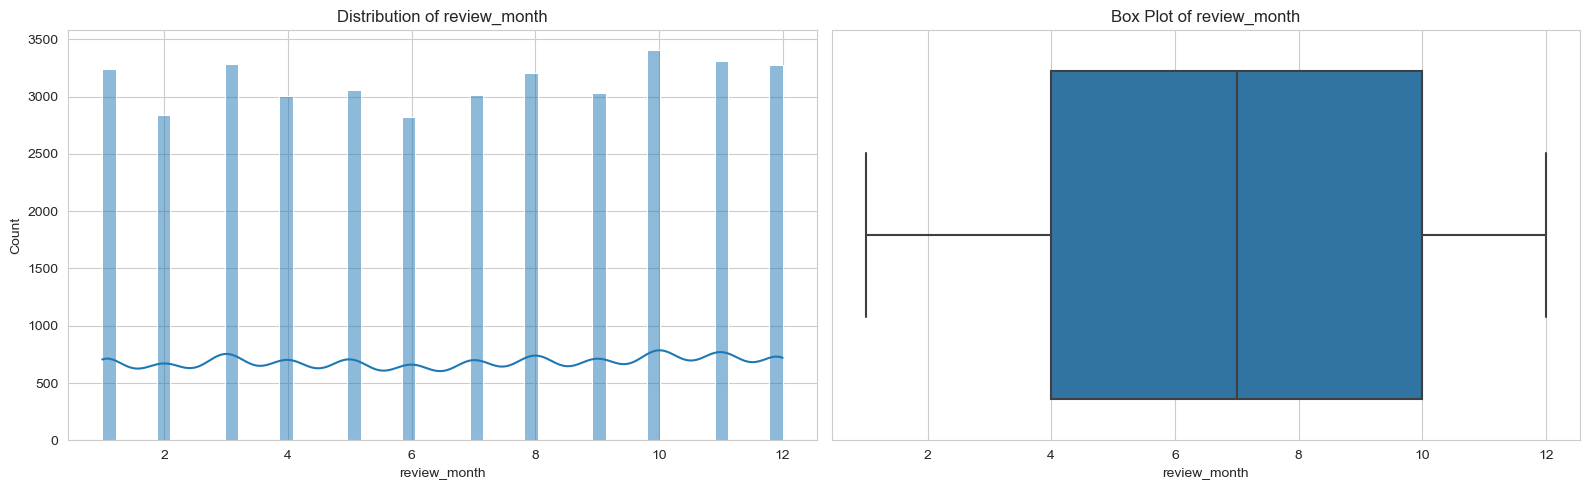

In [36]:
plot_dist_and_detect_outliers(df, 'review_month')

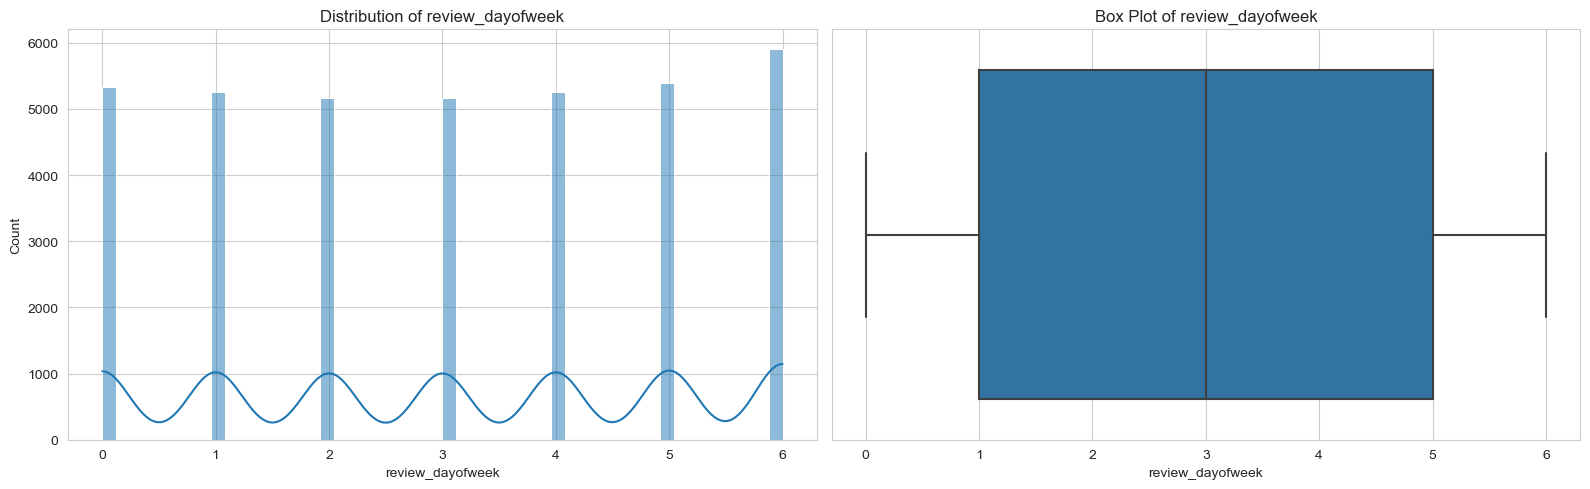

In [37]:
plot_dist_and_detect_outliers(df, 'review_dayofweek')

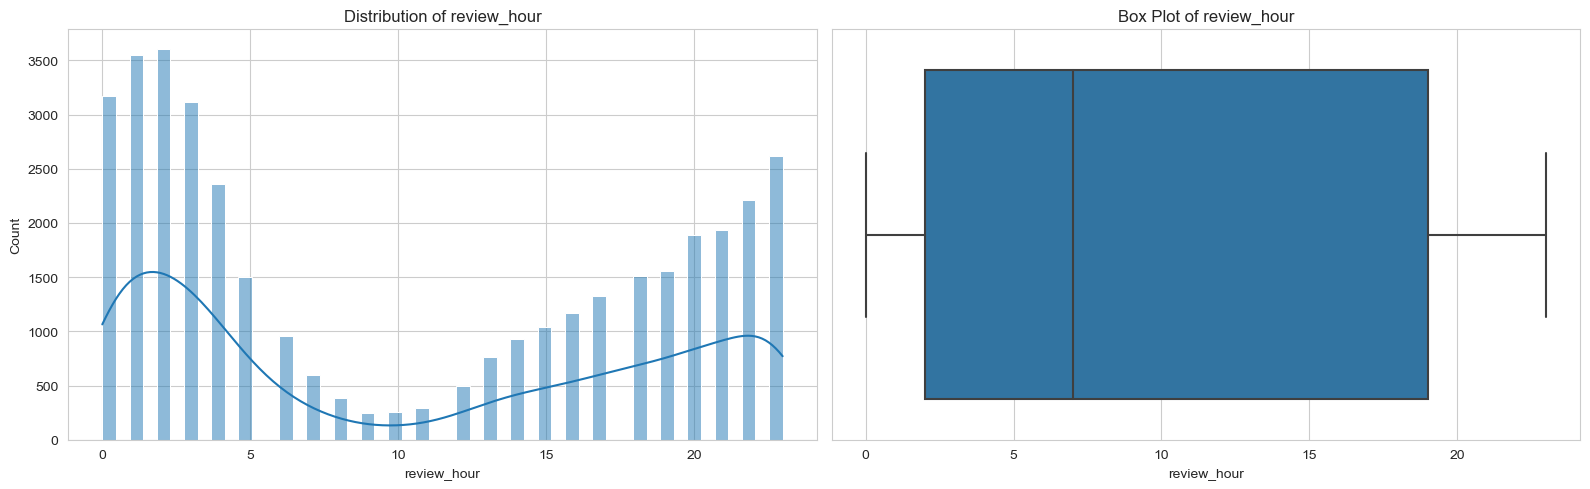

In [38]:
plot_dist_and_detect_outliers(df, 'review_hour')

### Removing Outliers

In [39]:
def remove_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


In [40]:
outlier_columns = ['beer_abv','beer_beerid','beer_brewerid','review_appearance','review_aroma',
 'review_palate','review_year','review_month','review_dayofweek','review_hour']
for col in outlier_columns:
    df[col] = remove_outliers(df[col].dropna())

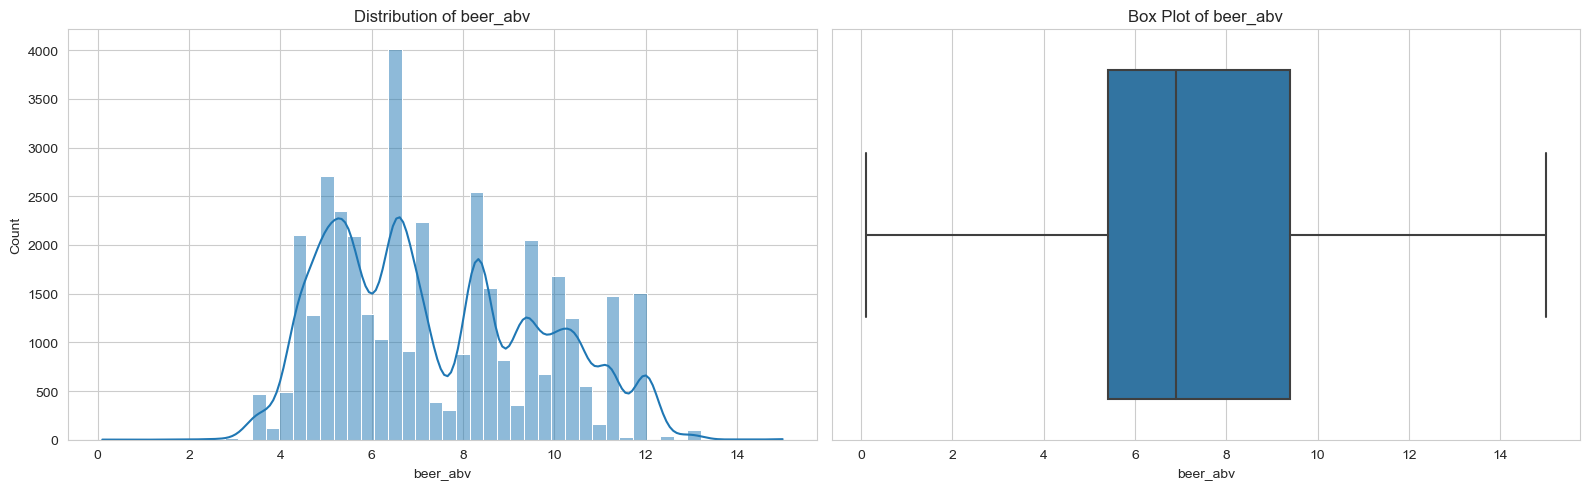

In [41]:
plot_dist_and_detect_outliers(df, 'beer_abv')

### Finally All the Ouliers have been removed

In [42]:
df.shape

(37485, 16)

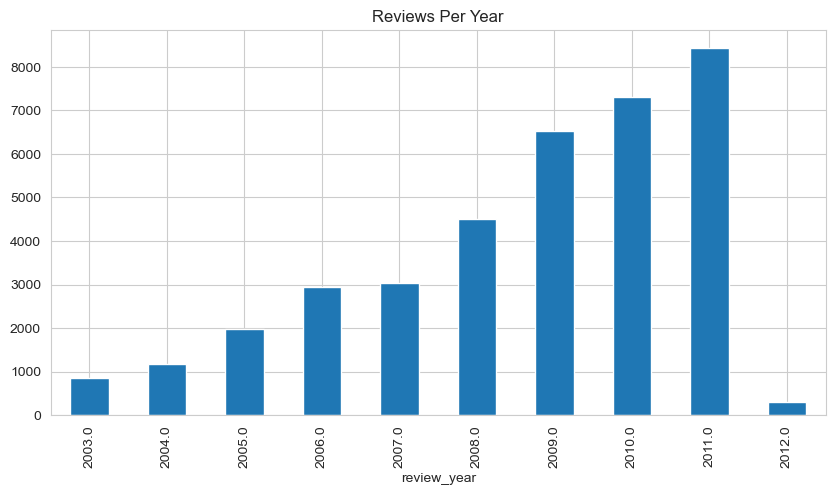

In [43]:
# Reviews Per Year
plt.figure(figsize=(10,5))
df['review_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Reviews Per Year")
plt.show()

Thus Most Beers enjoyed in the year 2011.

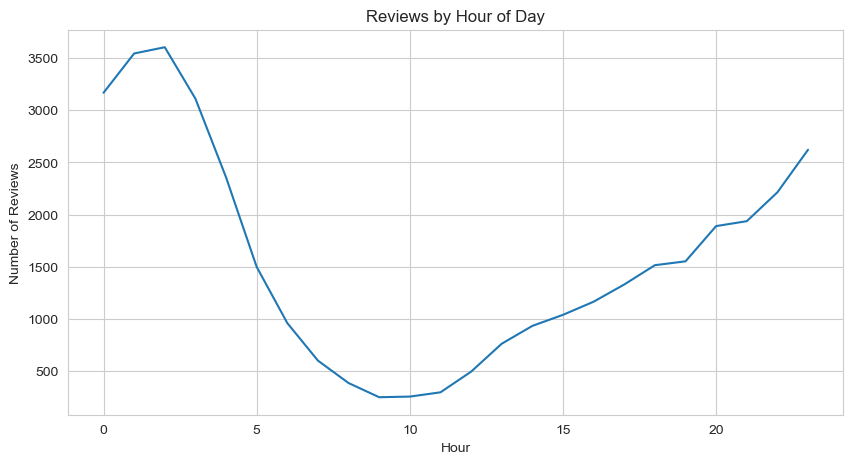

In [44]:
# Reviews by Hour of Day
plt.figure(figsize=(10,5))
sns.lineplot(x=df['review_hour'].value_counts().index, y=df['review_hour'].value_counts().values)
plt.title("Reviews by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Reviews")
plt.show()


## Bivariate Analysis

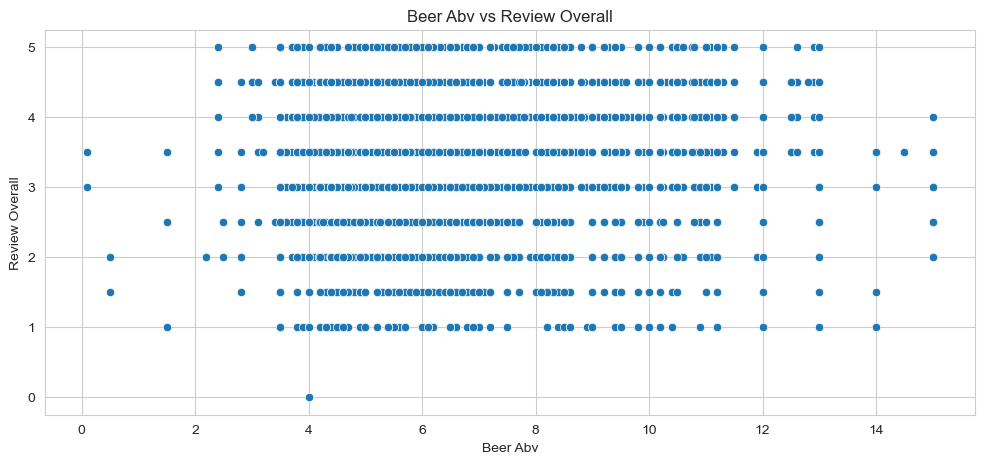

In [45]:
def plot_feature_vs_target(data, feature_column, target_column='review_overall'):
    plt.figure(figsize=(12,5))
    sns.scatterplot(x=data[feature_column], y=data[target_column])
    plt.xlabel(feature_column.replace('_', ' ').title())
    plt.ylabel(target_column.replace('_', ' ').title())
    plt.title(f"{feature_column.replace('_', ' ').title()} vs {target_column.replace('_', ' ').title()}")
    plt.show()


plot_feature_vs_target(df, 'beer_abv')

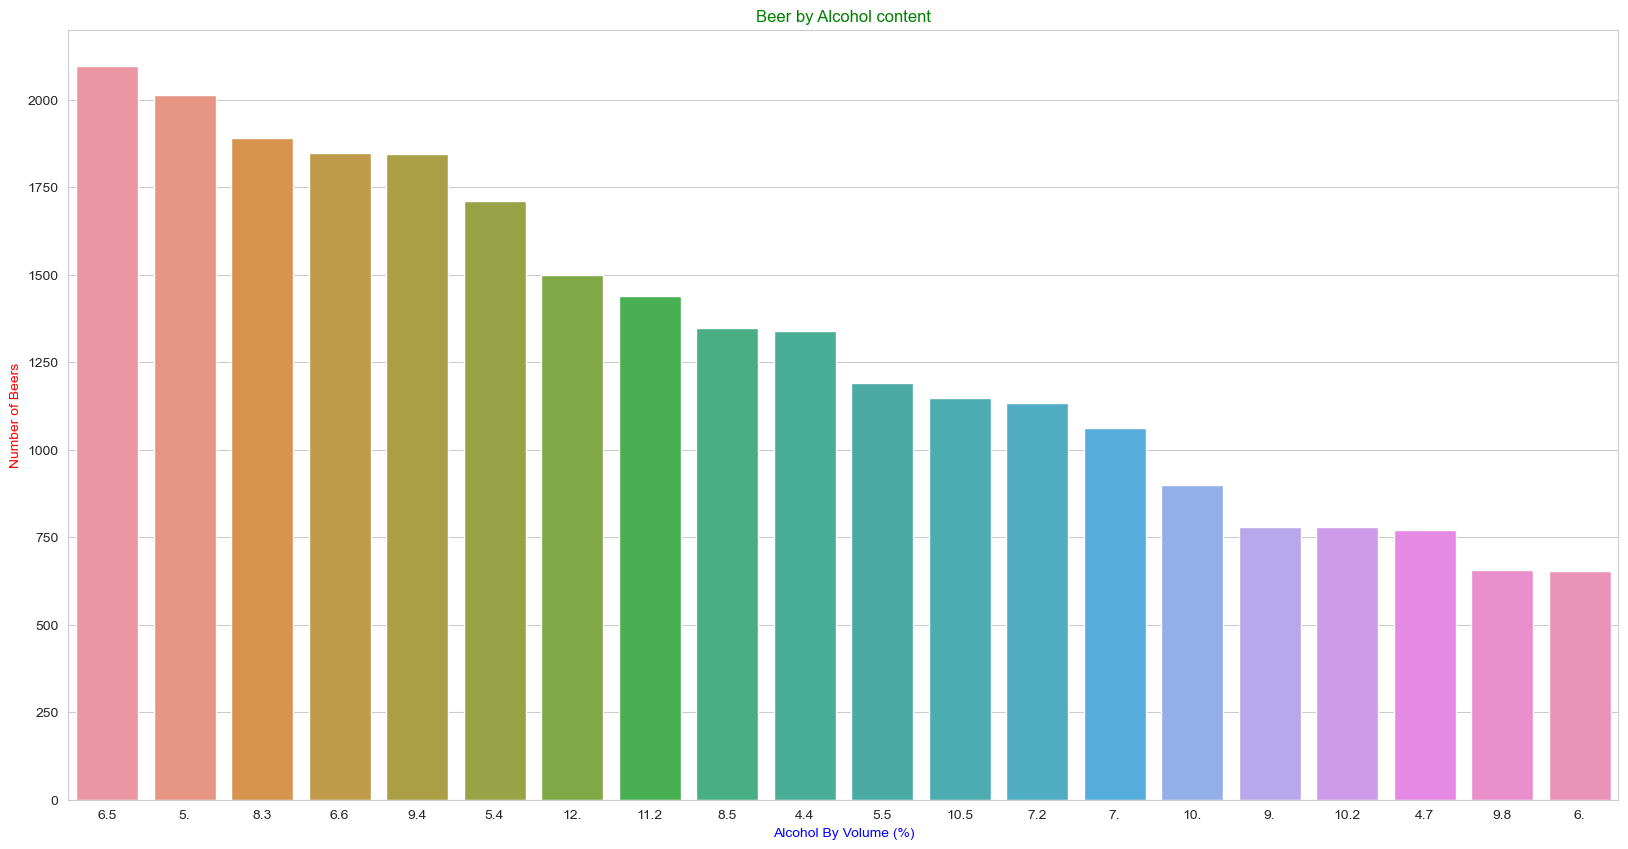

In [46]:
# Number of Beers By Alcohol content

df1 = df.groupby('beer_abv')['beer_name'].count().sort_values(ascending=False).head(20)

x = list(df1.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*1))

y = df1.values

plt.figure(figsize=(20,10))

sns.barplot(x=x,y=y)
plt.xlabel("Alcohol By Volume (%)",color='blue')
plt.ylabel("Number of Beers",color='red')
plt.title("Beer by Alcohol content", color='green')
plt.show()


In [47]:
df2 = df.groupby('beer_style')[['beer_abv','review_overall']].mean().sort_values('beer_style').reset_index()
#Beer style vs Beer ABV
fig = px.scatter(df2,x="beer_style",y="beer_abv")
fig.show()

In [48]:
#Beer ABV vs Overall Review
fig = px.scatter(df2,x="beer_abv",y="review_overall",trendline ='ols')
fig.show()

In [49]:
dff = df.copy()
num_columns =dff.select_dtypes(include=['number'])

In [50]:
corr_matrix = num_columns.corr()
corr_matrix

beer_abv  beer_beerid  beer_brewerid  review_appearance  \
beer_abv           1.000000     0.331593       0.329977           0.293009   
beer_beerid        0.331593     1.000000       0.217685          -0.008270   
beer_brewerid      0.329977     0.217685       1.000000           0.165926   
review_appearance  0.293009    -0.008270       0.165926           1.000000   
review_aroma       0.394154     0.037574       0.179960           0.510587   
review_overall     0.201300    -0.022103       0.131230           0.480423   
review_palate      0.359711     0.026228       0.183526           0.527229   
review_taste       0.360477     0.019249       0.190324           0.516833   
review_year        0.238743     0.408254       0.190819           0.066158   
review_month      -0.024958     0.029405      -0.000119          -0.019857   
review_dayofweek  -0.005394    -0.006413       0.001281          -0.006719   
review_hour       -0.066185    -0.006744      -0.040581          -0.015464   

                   review_aroma  review_overall  review_palate  review_taste  \
beer_abv               0.394154        0.201300       0.359711      0.360477   
beer_beerid            0.037574       -0.022103       0.026228      0.019249   
beer_brewerid          0.179960        0.131230       0.183526      0.190324   
review_appearance      0.510587        0.480423       0.527229      0.516833   
review_aroma           1.000000        0.585261       0.575128      0.687932   
review_overall         0.585261        1.000000       0.668810      0.785182   
review_palate          0.575128        0.668810       1.000000      0.709706   
review_taste           0.687932        0.785182       0.709706      1.000000   
review_year            0.102885        0.067250       0.094893      0.092667   
review_month          -0.013652       -0.015643      -0.021407     -0.018556   
review_dayofweek      -0.010649       -0.004439      -0.004272     -0.002666   
review_hour           -0.026372       -0.011524      -0.020957     -0.020441   

                   review_year  review_month  review_dayofweek  review_hour  
beer_abv              0.238743     -0.024958         -0.005394    -0.066185  
beer_beerid           0.408254      0.029405         -0.006413    -0.006744  
beer_brewerid         0.190819     -0.000119          0.001281    -0.040581  
review_appearance     0.066158     -0.019857         -0.006719    -0.015464  
review_aroma          0.102885     -0.013652         -0.010649    -0.026372  
review_overall        0.067250     -0.015643         -0.004439    -0.011524  
review_palate         0.094893     -0.021407         -0.004272    -0.020957  
review_taste          0.092667     -0.018556         -0.002666    -0.020441  
review_year           1.000000     -0.045438         -0.007699    -0.038229  
review_month         -0.045438      1.000000         -0.004431     0.011805  
review_dayofweek     -0.007699     -0.004431          1.000000     0.055966  
review_hour          -0.038229      0.011805          0.055966     1.000000

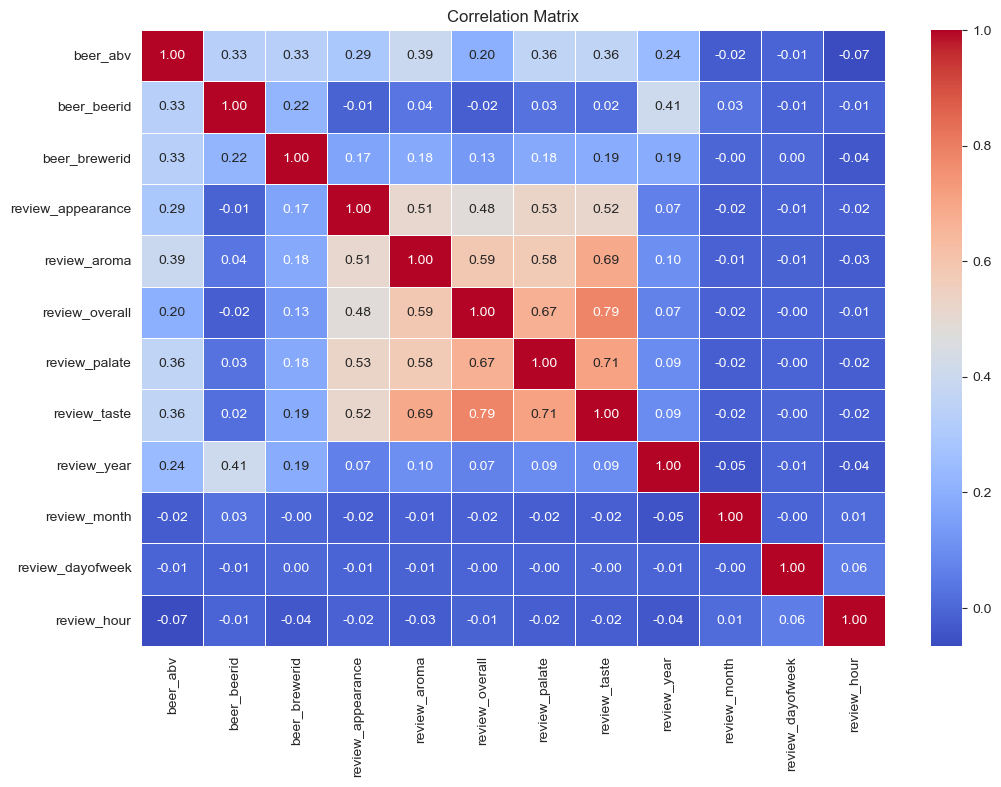

In [51]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Standard Pearson Correlation coefficient is used here to calculate the correlation between different factors and overall beer quatlity.
- It can be observed that the 'review_taste' feature is most correlated with the 'review_overall' feature and thus we can conclude it to be an important feature based on user's review and different ratings.

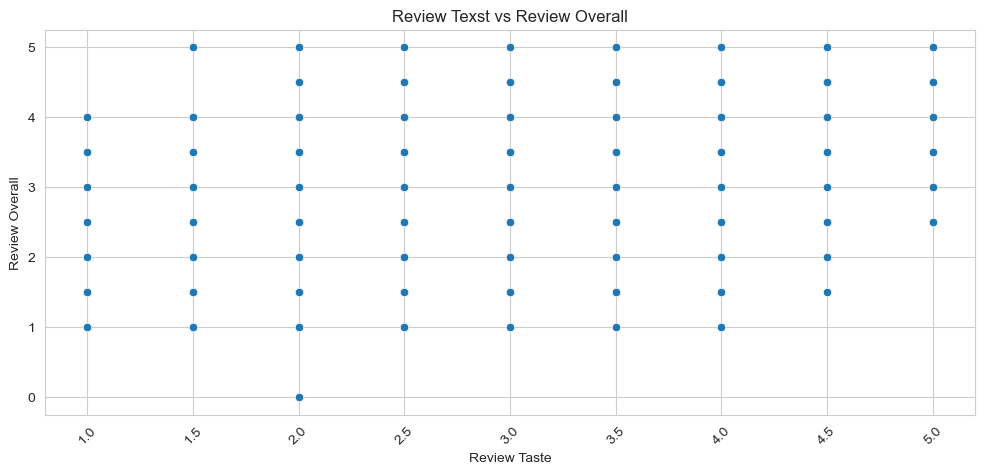

In [52]:
def review_taste_vs_review_overall(data):
    plt.figure(figsize=(12,5))
    sns.scatterplot(x=df['review_taste'], y=df['review_overall'])
    plt.xlabel("Review Taste")
    plt.ylabel("Review Overall")
    plt.title("Review Texst vs Review Overall")
    plt.xticks(rotation=45)
    plt.show()

# Example usage
review_taste_vs_review_overall(df)

# Text Analysis

In [53]:
for i in range(5):
    print('Review: ',[i])
    print(df['review_text'].iloc[i], '\n')
    

Review:  [0]
Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed. 

Review:  [1]
12oz bottle into 8oz snifter.		Deep ruby red hue with a one finger light tan head that settles to a thin rim along the glass.		Sharp piercing hops with some light hard candy in the background. 		The hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness.		A very sweet barleywi

In [54]:
def clean_text(text):
#     if not isinstance(text, str):  # Handle NaN or non-string values
#         return ""  
    
    # Remove numbers (standalone or within units like "12oz", "750ml")
    text = re.sub(r'\b\d+\w*\b', '', text)  
    
    # Remove special characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove new lines and extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    return text.lower()

# Apply function to the DataFrame column
df['review_text'] = df['review_text'].apply(clean_text)

df.head()

beer_abv  beer_beerid  beer_brewerid                  beer_name  \
0       5.0      46634.0            NaN                   Chiostro   
1      11.0       3003.0          395.0   Bearded Pat's Barleywine   
2       4.7        961.0          365.0       Naughty Nellie's Ale   
3       4.4        429.0            1.0            Pilsner Urquell   
4       4.4       4904.0         1417.0  Black Sheep Ale (Special)   

                beer_style  review_appearance  review_aroma  review_overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review_palate  review_taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   
3            3.0           3.0   
4            3.5           2.5   

                                         review_text user_profilename  \
0  pours a clouded gold with a thin white head no...       RblWthACoz   
1  bottle into snifter deep ruby red hue with a o...          BeerSox   
2  first enjoyed at the brewpub about years ago i...       mschofield   
3  first thing i noticed after pouring from green...        molegar76   
4  a pours an amber with a one finger head but on...       Brewbro000   

   review_year  review_month  review_dayofweek  review_hour  
0       2008.0            12                 1            3  
1       2008.0             8                 4           23  
2       2004.0            11                 4           18  
3       2011.0             6                 0            1  
4       2011.0             3                 5            6

In [55]:
df['review_text'][0]

'pours a clouded gold with a thin white head nose is quite floral with a larger amount of spices added definitely a spice forward fragrance flavor has an odd burn that hits on the first sip after it fades it seems like a dirty vanilla aftertaste perhaps this is the absinthe regardless of that i get a quite spiced tone on the tongue almost feel a little heat from it i think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are overall a nice drinker indeed'

In [56]:
#Number of words in each review text
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

df['word_count'] = df['review_text'].apply(no_of_words)

<Axes: xlabel='word_count', ylabel='Count'>

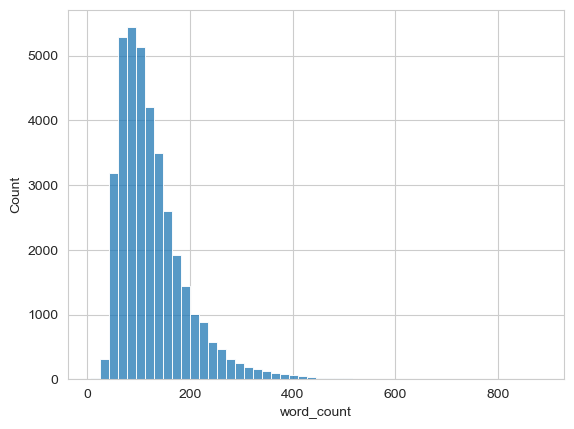

In [57]:
#the distribution of word counts in reviews
sns.histplot(df['word_count'], bins=50)

In [58]:
#Length of reviews
df['review_length'] = df['review_text'].apply(len)
df.head()

beer_abv  beer_beerid  beer_brewerid                  beer_name  \
0       5.0      46634.0            NaN                   Chiostro   
1      11.0       3003.0          395.0   Bearded Pat's Barleywine   
2       4.7        961.0          365.0       Naughty Nellie's Ale   
3       4.4        429.0            1.0            Pilsner Urquell   
4       4.4       4904.0         1417.0  Black Sheep Ale (Special)   

                beer_style  review_appearance  review_aroma  review_overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review_palate  review_taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   
3            3.0           3.0   
4            3.5           2.5   

                                         review_text user_profilename  \
0  pours a clouded gold with a thin white head no...       RblWthACoz   
1  bottle into snifter deep ruby red hue with a o...          BeerSox   
2  first enjoyed at the brewpub about years ago i...       mschofield   
3  first thing i noticed after pouring from green...        molegar76   
4  a pours an amber with a one finger head but on...       Brewbro000   

   review_year  review_month  review_dayofweek  review_hour  word_count  \
0       2008.0            12                 1            3          94   
1       2008.0             8                 4           23         100   
2       2004.0            11                 4           18          66   
3       2011.0             6                 0            1          66   
4       2011.0             3                 5            6          93   

   review_length  
0            508  
1            542  
2            376  
3            375  
4            475

Text(0, 0.5, 'frequency')

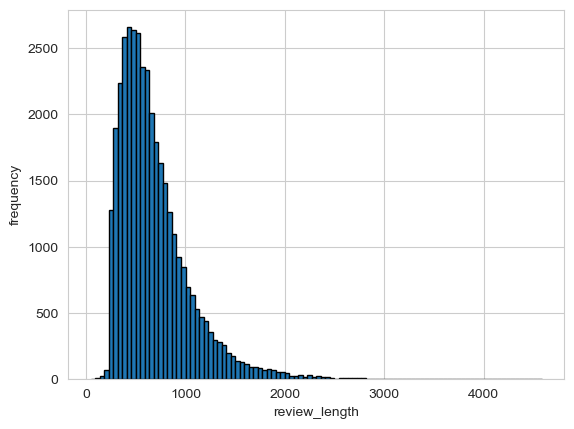

In [59]:
# Plot the distribution of reviews length
plt.hist(x='review_length',data=df,edgecolor = "black", bins = 100)
plt.xlabel('review_length')
plt.ylabel('frequency')

In [60]:
#2. Removing stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    # print(stop_words)
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [61]:
df['review_text'] = df['review_text'].apply(remove_stopwords)

In [62]:
df['review_text'][0]

'pours clouded gold thin white head nose quite floral larger amount spices added definitely spice forward fragrance flavor odd burn hits first sip fades seems like dirty vanilla aftertaste perhaps absinthe regardless get quite spiced tone tongue almost feel little heat think inexperienced palate spices contributing ignorance precisely overall nice drinker indeed'

In [63]:
#3. Convert words into its root word
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

df.review_text = df['review_text'].apply(lambda x: stemming(x))

Text(0.5, 1.0, 'Most frequent words in reviews')

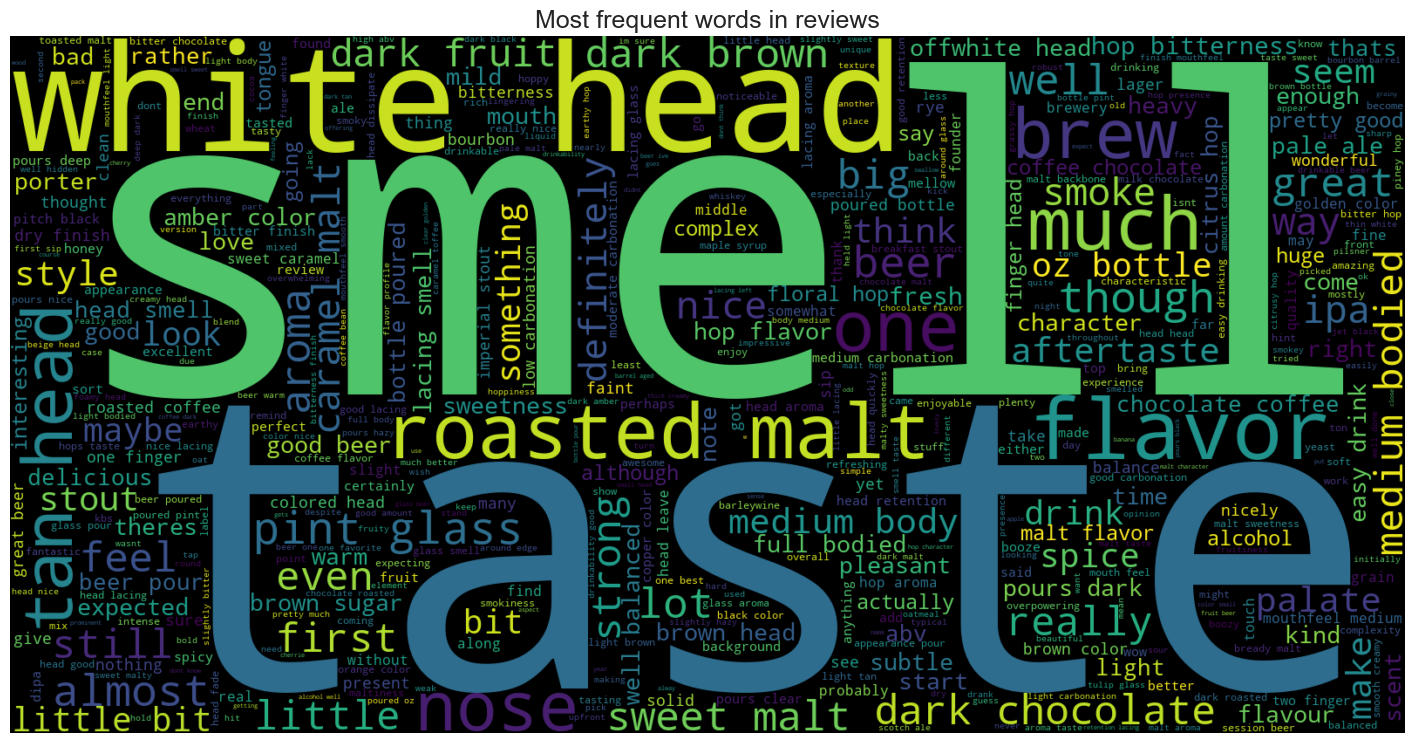

In [64]:
#Plot wordcloud
text = ' '.join([word for word in df['review_text']])
plt.figure(figsize=(18,22), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Most frequent words in reviews', fontsize=18)

In [65]:
#Top 10 frequent words reviews
from collections import Counter
count = Counter()
for text in df['review_text'].values:
    for word in text.split():
        count[word] += 1
count.most_common(10)

[('beer', 46498),
 ('head', 36238),
 ('taste', 26328),
 ('nice', 24448),
 ('good', 22930),
 ('malt', 21940),
 ('like', 21328),
 ('hops', 20975),
 ('one', 20592),
 ('sweet', 20122)]

In [66]:
words = pd.DataFrame(count.most_common(10))
words.columns = ['word','count']
words.head()

word  count
0   beer  46498
1   head  36238
2  taste  26328
3   nice  24448
4   good  22930

In [67]:
#plot most frequent word in reviews
px.bar(words, x='count',y='word',title='Common words in reviews',color='word')


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
text_features = tfidf.fit_transform(df['review_text']).toarray()


In [69]:
text_feature_names = [f'tfidf_{i}' for i in range(text_features.shape[1])]
text_df = pd.DataFrame(text_features, columns=text_feature_names)

In [70]:
text_df.head()

tfidf_0  tfidf_1   tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6   tfidf_7  \
0      0.0      0.0  0.152831      0.0      0.0      0.0      0.0  0.136422   
1      0.0      0.0  0.000000      0.0      0.0      0.0      0.0  0.000000   
2      0.0      0.0  0.000000      0.0      0.0      0.0      0.0  0.000000   
3      0.0      0.0  0.000000      0.0      0.0      0.0      0.0  0.153761   
4      0.0      0.0  0.000000      0.0      0.0      0.0      0.0  0.000000   

    tfidf_8  tfidf_9  tfidf_10  tfidf_11  tfidf_12  tfidf_13  tfidf_14  \
0  0.000000      0.0       0.0       0.0  0.000000       0.0  0.167395   
1  0.154975      0.0       0.0       0.0  0.000000       0.0  0.000000   
2  0.000000      0.0       0.0       0.0  0.000000       0.0  0.000000   
3  0.000000      0.0       0.0       0.0  0.000000       0.0  0.000000   
4  0.000000      0.0       0.0       0.0  0.136818       0.0  0.000000   

   tfidf_15  tfidf_16  tfidf_17  tfidf_18  tfidf_19  tfidf_20  tfidf_21  \
0       0.0       0.0       0.0       0.0  0.000000       0.0       0.0   
1       0.0       0.0       0.0       0.0  0.083885       0.0       0.0   
2       0.0       0.0       0.0       0.0  0.109650       0.0       0.0   
3       0.0       0.0       0.0       0.0  0.000000       0.0       0.0   
4       0.0       0.0       0.0       0.0  0.000000       0.0       0.0   

   tfidf_22  tfidf_23  tfidf_24  tfidf_25  tfidf_26  tfidf_27  tfidf_28  \
0       0.0       0.0       0.0  0.000000       0.0   0.00000  0.000000   
1       0.0       0.0       0.0  0.000000       0.0   0.16744  0.141234   
2       0.0       0.0       0.0  0.000000       0.0   0.00000  0.000000   
3       0.0       0.0       0.0  0.000000       0.0   0.00000  0.000000   
4       0.0       0.0       0.0  0.155088       0.0   0.00000  0.000000   

   tfidf_29  tfidf_30  tfidf_31  tfidf_32  tfidf_33  tfidf_34  tfidf_35  \
0  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
1  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
2  0.175523       0.0       0.0       0.0       0.0       0.0       0.0   
3  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
4  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   

   tfidf_36  tfidf_37  tfidf_38  tfidf_39  tfidf_40  tfidf_41  tfidf_42  \
0  0.000000       0.0       0.0       0.0  0.000000  0.000000       0.0   
1  0.000000       0.0       0.0       0.0  0.000000  0.000000       0.0   
2  0.080492       0.0       0.0       0.0  0.000000  0.174536       0.0   
3  0.000000       0.0       0.0       0.0  0.182826  0.176613       0.0   
4  0.000000       0.0       0.0       0.0  0.000000  0.153325       0.0   

   tfidf_43  tfidf_44  tfidf_45  tfidf_46  tfidf_47  tfidf_48  tfidf_49  \
0  0.000000       0.0       0.0  0.000000       0.0       0.0  0.000000   
1  0.088407       0.0       0.0  0.199361       0.0       0.0  0.119120   
2  0.000000       0.0       0.0  0.000000       0.0       0.0  0.155706   
3  0.000000       0.0       0.0  0.000000       0.0       0.0  0.000000   
4  0.000000       0.0       0.0  0.000000       0.0       0.0  0.000000   

   tfidf_50  tfidf_51  tfidf_52  tfidf_53  tfidf_54  tfidf_55  tfidf_56  \
0       0.0       0.0       0.0  0.000000       0.0       0.0  0.000000   
1       0.0       0.0       0.0  0.089606       0.0       0.0  0.000000   
2       0.0       0.0       0.0  0.117128       0.0       0.0  0.000000   
3       0.0       0.0       0.0  0.355565       0.0       0.0  0.000000   
4       0.0       0.0       0.0  0.000000       0.0       0.0  0.192752   

   tfidf_57  tfidf_58  tfidf_59  tfidf_60  tfidf_61  tfidf_62  tfidf_63  \
0  0.000000       0.0       0.0       0.0       0.0       0.0  0.000000   
1  0.000000       0.0       0.0       0.0       0.0       0.0  0.000000   
2  0.000000       0.0       0.0       0.0       0.0       0.0  0.000000   
3  0.000000       0.0       0.0       0.0       0.0       0.0  0.000000   
4 

In [71]:

# tfidf_df = pd.DataFrame(text_features, columns=tfidf.get_feature_names_out())
# df = pd.concat([df, tfidf_df], axis=1)
# df.drop(columns=['review_text'], inplace=True)

In [72]:
# tfidf = TfidfVectorizer(max_features=500)
# text_features = tfidf.fit_transform(data['review_text'].astype(str)).toarray()
# text_feature_names = [f'tfidf_{i}' for i in range(text_features.shape[1])]
# text_df = pd.DataFrame(text_features, columns=text_feature_names)

# data = pd.concat([data, text_df], axis=1)
# data.drop(columns=['review_text'], inplace=True)


## Beer Style Feature

In [73]:
df['beer_style'].value_counts().index

Index(['American Double / Imperial Stout', 'American IPA',
       'American Double / Imperial IPA', 'Scotch Ale / Wee Heavy',
       'Russian Imperial Stout', 'American Pale Ale (APA)', 'American Porter',
       'Rauchbier', 'Rye Beer', 'Czech Pilsener', 'Fruit / Vegetable Beer',
       'English Pale Ale', 'Old Ale', 'Doppelbock', 'American Barleywine',
       'Euro Pale Lager', 'Extra Special / Strong Bitter (ESB)',
       'American Amber / Red Ale', 'Munich Helles Lager', 'Hefeweizen',
       'American Stout', 'German Pilsener', 'Belgian Strong Pale Ale',
       'Pumpkin Ale', 'MÃ¤rzen / Oktoberfest', 'Baltic Porter', 'Light Lager',
       'English Brown Ale', 'Wheatwine', 'American Blonde Ale',
       'English Porter', 'Euro Strong Lager', 'American Brown Ale', 'Tripel',
       'Winter Warmer', 'English Bitter', 'Maibock / Helles Bock',
       'American Adjunct Lager', 'Belgian Dark Ale', 'American Strong Ale',
       'English Strong Ale', 'English India Pale Ale (IPA)', 'Altbier',


In [74]:
# Beer style classification
beer_style_mapping = {
    "Lager": [
        "American Adjunct Lager", "American Pale Lager", "Euro Pale Lager", "Euro Strong Lager",
        "Dortmunder / Export Lager", "Munich Helles Lager", "Munich Dunkel Lager", "Schwarzbier",
        "Vienna Lager", "Czech Pilsener", "German Pilsener", "Märzen / Oktoberfest"
    ],
    "Ale": [
        "American Amber / Red Ale", "American Blonde Ale", "American Brown Ale", "American Strong Ale",
        "American Pale Ale (APA)", "English Pale Ale", "English Bitter", "English Barleywine",
        "Scottish Ale", "Scotch Ale / Wee Heavy", "English Strong Ale", "English Dark Mild Ale",
        "English Pale Mild Ale"
    ],
    "Stout": [
        "American Stout", "English Stout", "Oatmeal Stout", "Milk / Sweet Stout", "Dry Stout",
        "Foreign / Export Stout", "Irish Dry Stout", "Russian Imperial Stout", "American Double / Imperial Stout"
    ],
    "Porter": [
        "American Porter", "Baltic Porter", "English Porter"
    ],
    "Wheat Beer": [
        "Hefeweizen", "Kristalweizen", "Dunkelweizen", "Weizenbock", "American Pale Wheat Ale"
    ],
    "Belgian Style": [
        "Dubbel", "Tripel", "Quadrupel (Quad)", "Belgian Pale Ale", "Belgian IPA",
        "Belgian Strong Pale Ale", "Belgian Strong Dark Ale", "Belgian Dark Ale", "Bière de Garde"
    ],
    "IPA": [
        "American IPA", "English India Pale Ale (IPA)", "Belgian IPA", "American Double / Imperial IPA"
    ],
    "Barleywine & Strong Ales": [
        "American Barleywine", "English Barleywine", "Wheatwine", "American Strong Ale"
    ],
    "Specialty & Experimental": [
        "American Wild Ale", "Chile Beer", "Herbed / Spiced Beer", "Pumpkin Ale", "Braggot",
        "Keller Bier / Zwickel Bier", "Scottish Gruit / Ancient Herbed Ale", "Rauchbier", "Smoked Beer",
        "California Common / Steam Beer"
    ],
    "Sour & Lambics": [
        "Lambic - Unblended", "Lambic - Fruit", "Flanders Red Ale", "Flanders Oud Bruin", "Berliner Weissbier"
    ],
    "Bocks": [
        "Doppelbock", "Bock", "Eisbock", "Maibock / Helles Bock"
    ],
    "Low Alcohol": [
        "Low Alcohol Beer"
    ]
}

# Function to map beer style to its group
def categorize_beer_style(style):
    for category, styles in beer_style_mapping.items():
        if style in styles:
            return category
    return "Other"  # If not categorized, mark as "Other"

# Define ABV groups
def categorize_abv(abv):
    if abv < 4.0:
        return "Low ABV"
    elif 4.0 <= abv < 6.0:
        return "Medium ABV"
    elif 6.0 <= abv < 8.0:
        return "High ABV"
    else:
        return "Very High ABV"

# Apply both mappings
df["Beer_Style_Group"] = df["beer_style"].apply(categorize_beer_style)
df["ABV_Group"] = df["beer_abv"].apply(categorize_abv)

In [75]:
df["Beer_Style_Group"].value_counts()

Beer_Style_Group
Stout                       7320
Ale                         6447
IPA                         6042
Other                       5955
Lager                       3295
Porter                      2359
Specialty & Experimental    2167
Belgian Style               1288
Barleywine & Strong Ales     977
Bocks                        949
Wheat Beer                   650
Sour & Lambics                29
Low Alcohol                    7
Name: count, dtype: int64

In [76]:
df["ABV_Group"].value_counts()

ABV_Group
Very High ABV    15671
Medium ABV       11651
High ABV          9532
Low ABV            631
Name: count, dtype: int64

# Encoding Categorical features


In [77]:
# Encode categorical features
label_enc = LabelEncoder()
df['beer_style'] = label_enc.fit_transform(df['beer_style'])

# Feature Scaling for Numerical Variables
Scaling ensures numerical features have the same scale, improving model performance.

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['review_taste_scaled'] = scaler.fit_transform(df[['review_taste']])


In [79]:
#Save Processed Dataset
df.to_csv("processed_beer_data.csv", index=False)


# Model Training

In [80]:
X = df[['beer_style','review_taste_scaled']]
y = df['review_overall']

In [81]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#Training Random Forest Regressor Models
rf_model = RandomForestRegressor(max_depth=10,min_samples_split=10,n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Regressor:
MAE: 0.31537140738999014
MSE: 0.17194144435931824
R2 Score: 0.644280655629549


In [84]:
#Training XGBoost Regression
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}")

XGBoost Regressor:
MAE: 0.31554482186557736
MSE: 0.17227331836822526
R2 Score: 0.64359406139218


## Hyperparameter tunning for better result

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],        
    'learning_rate': [0.01, 0.1, 0.2],      
    'max_depth': [3, 5, 7],                  
    'min_child_weight': [1, 3, 5],           
    'subsample': [0.7, 0.8, 0.9],           
    'colsample_bytree': [0.7, 0.8, 0.9],     
    'gamma': [0, 0.1, 0.2]                 
}

grid_search = GridSearchCV(estimator=XGBRegressor(), 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=3,                               
                           verbose=1,                          
                           n_jobs=-1,                          
                           refit=True)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative Mean Squared Error): {grid_search.best_score_}")

best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best Score (Negative Mean Squared Error): -0.17889312528461274


In [87]:
#Training XGBoost Regression
xgb_model = XGBRegressor(colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, 
                         n_estimators=200, subsample=0.9, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}")

XGBoost Regressor:
MAE: 0.31374636153721946
MSE: 0.1687911785809371
R2 Score: 0.6507980516038236


### We can see after applying Hyperparameter tunning get slightly better result with MSE and R2 score. MSE decreases and R2 Score increases

## We can choose this model for final prediction


In [88]:
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [10, 20, 30, None],       
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]              
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=5,                               
                           verbose=1,                          
                           n_jobs=-1,                          
                           refit=True)


grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative Mean Squared Error): {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative Mean Squared Error): -0.1804066701924162


## Conclusions

- Performed complete Exploratory Data Analysis on the given dataset and trained with multiple models.

- Till Now, I have trained model using features beer_style & review_taste_scaled. Working on train model with review_text, user_name also for better accurate prediction of overall_review.

- I choosed review_taste feature for model training because it has strong correlation with target feature.